# Week 2 - Assignment

In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
from matplotlib.artist import Artist

import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 4000

In [3]:
# ------------------------- Prep data for 2005-2014 -------------------------
# Read the file
df = pd.read_csv('Course2_Resources/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Top values (comparing data from all stations)
# From 165.085 to around 4.000 rows
df = df.groupby('Date').agg({'Data_Value' : (np.max, np.min)})
df = df['Data_Value']
# Setting a datetime index
df.index = pd.to_datetime(df.index)

# Pulling the data for the period 2005-2014
dfUpTo2014 = df[:'2014']

# Pulling month and day info for later comparison between years
dfUpTo2014['Year'] = dfUpTo2014.index.year
dfUpTo2014['Month'] = dfUpTo2014.index.month
dfUpTo2014['Day'] = dfUpTo2014.index.day

# Comparison for same month and day between years
# From around 4.000 rows to 360 approx.
dfUpTo2014 = dfUpTo2014.groupby(['Month', 'Day']).agg({'amax' : np.max, 'amin' : np.min})
dfUpTo2014


# ------------------------- Prep data for 2015 -------------------------
df2 = pd.read_csv('Course2_Resources/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Top values (comparing data from all stations)
# From 165.085 to around 4.000 rows
df2 = df2.groupby('Date').agg({'Data_Value' : (np.max, np.min)})
df2 = df2['Data_Value']
# Setting a datetime index
df2.index = pd.to_datetime(df.index)

# Pulling the data for the year 2015
df2015 = df2['2015']

# Pulling month and day info for later comparison between years
df2015['Month'] = df2015.index.month
df2015['Day'] = df2015.index.day
df2015.set_index(['Month', 'Day'], inplace = True)
df2015.columns = ['Max 2015', 'Min 2015']
dfUpTo2014.columns = ['Max 2005-2014', 'Min 2005-2014']
comparison = pd.merge(dfUpTo2014, df2015, how = 'left', left_index = True, right_index = True)
comparison['2015 broke max record'] = comparison['Max 2015'] > comparison['Max 2005-2014']
comparison['2015 broke min record'] = comparison['Min 2015'] < comparison['Min 2005-2014']
comparison

Max 2005-2014  Min 2005-2014  Max 2015  Min 2015  \
Month Day                                                     
1     1              156           -160      11.0    -133.0   
      2              139           -267      39.0    -122.0   
      3              133           -267      39.0     -67.0   
      4              106           -261      44.0     -88.0   
      5              128           -150      28.0    -155.0   
      6              189           -266      33.0    -182.0   
      7              217           -306     -67.0    -182.0   
      8              194           -294     -82.0    -211.0   
      9              178           -278     -66.0    -206.0   
      10             100           -256     -71.0    -206.0   
      11             156           -183       6.0    -200.0   
      12             161           -193       6.0    -117.0   
      13             167           -250       0.0    -216.0   
      14             150           -266     -56.0    -244.0   
      15              67           -272      -5.0    -200.0   
      16              94           -294       6.0    -167.0   
      17             133           -294      78.0    -117.0   
      18             122           -289      83.0    -100.0   
      19             106           -300      67.0     -17.0   
      20             133           -239      39.0     -33.0   
      21             133           -260      22.0     -61.0   
      22             117           -277      -5.0     -67.0   
      23             128           -250      11.0    -100.0   
      24             117           -267      44.0     -61.0   
      25             100           -243      33.0     -88.0   
      26              89           -238      28.0    -150.0   
      27              78           -239      -5.0    -161.0   
      28             122           -294       6.0    -172.0   
      29             178           -278      39.0    -167.0   
      30             183           -233      28.0    -143.0   
      31             144           -194      28.0    -156.0   
2     1              150           -211      39.0    -122.0   
      2              106           -211     -22.0    -193.0   
      3               89           -232     -21.0    -238.0   
      4              117           -261      11.0    -211.0   
      5              122           -282      11.0    -277.0   
      6              117           -261       0.0    -250.0   
      7              117           -233      56.0    -122.0   
      8              128           -228      83.0     -56.0   
      9               78           -210      83.0    -116.0   
      10             161           -256       0.0    -171.0   
      11             161           -255      33.0    -150.0   
      12             194           -288      11.0    -211.0   
      13              94           -272     -32.0    -266.0   
      14             106           -217     -27.0    -239.0   
      15             117           -256     -39.0    -260.0   
      16             144           -222    -121.0    -294.0   
      17             156           -243     -55.0    -272.0   
      18             144           -222     -39.0    -217.0   
      19             128           -188     -56.0    -260.0   
      20             106           -178     -88.0    -343.0   
      21             100           -178     -10.0    -322.0   
      22             106           -172       0.0    -160.0   
      23             122           -228      22.0    -267.0   
      24             111           -211     -38.0    -272.0   
      25              94           -172     -38.0    -217.0   
      26             111           -200     -33.0    -216.0   
      27             122           -238     -50.0    -288.0   
      28             117           -271     -39.0    -272.0   
      29             167           -128       NaN       NaN   
3     1              117           -267     -17.0    -244.0   
      2              156           -182   

In [4]:
dates = []
tmax = []
tmax2015 = []
tmin = []
tmin2015 = []

for ind, row in comparison.iterrows():
    dates.append(str(ind[1]) + '/' + str(ind[0]))
    
    if row['2015 broke max record'] == True:
        tmax.append(row['Max 2015'])
        tmax2015.append(row['Max 2015'])
        
    else:
        tmax.append(row['Max 2005-2014'])
        tmax2015.append(np.nan)

for ind, row in comparison.iterrows():
    if row['2015 broke min record'] == True:
        tmin.append(row['Min 2015'])
        tmin2015.append(row['Min 2015'])
        
    else:
        tmin.append(row['Min 2005-2014'])
        tmin2015.append(np.nan)
        
# Temperature correction, dividing by 10
tmax = list(map(lambda x: x / 10, tmax))
tmax2015 = list(map(lambda x: x / 10, tmax2015))
tmin = list(map(lambda x: x / 10, tmin))
tmin2015 = list(map(lambda x: x / 10, tmin2015))

<IPython.core.display.Javascript object>


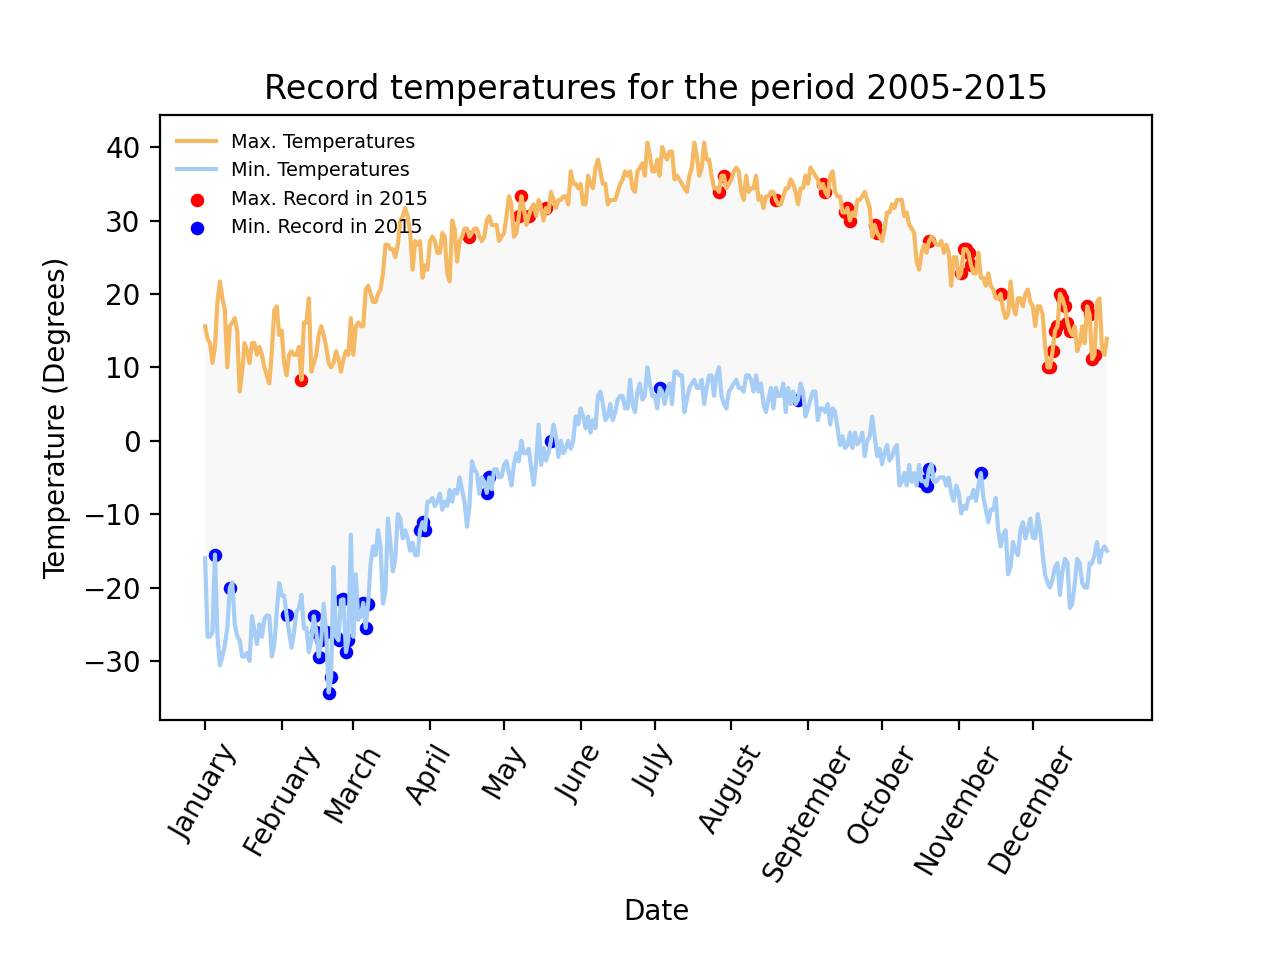

In [6]:
plt.figure()

# Plot the max and min temperature records for period 2005 - 2015, including the latter
plt.plot(dates, tmax, '-', label = 'Max. Temperatures', c = '#F5B964')
plt.plot(dates, tmin, '-', label = 'Min. Temperatures', c = '#A6CDF5')

# highlighting those days where 2015 broke the record
plt.scatter(dates, tmax2015, s = 15, label = 'Max. Record in 2015', c = 'red')
plt.scatter(dates, tmin2015, s = 15, label = 'Min. Record in 2015',  c = 'blue')

# Fill space between both lines
plt.gca().fill_between(range(len(tmax)),
                      tmin, tmax, facecolor = 'grey', alpha = 0.05)

# Setting values of the xaxis
# We choose the positions for major ticks to show up and what values those ticks should
# show
ticks = [0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']
plt.xticks(ticks, labels)

# Pulling the xaxis ticks for later editing
x = plt.gca().xaxis

# Rotating the xaxis ticks
for item in x.get_ticklabels():
    item.set_rotation(60)
    
# Labels for the axis
plt.xlabel('Date')
plt.ylabel('Temperature (Degrees)')
plt.title('Record temperatures for the period 2005-2015')
plt.legend(loc = 'upper left', frameon = False, fontsize = 'x-small')

    
plt.subplots_adjust(bottom = 0.25)

plt.savefig('Week2_Assignment_Jonathan.png')
plt.show()